## **Import library dan data**

In [20]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

##**Load Dataset**

In [21]:
# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/02.%20Deep%20Learning/Dataset/Infrared.csv")

In [22]:
# Cek & isi nilai kosong (imputasi)
df["Distance"].fillna(df["Distance"].mean(), inplace=True)

<ipython-input-22-6c8baaced5cc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Distance"].fillna(df["Distance"].mean(), inplace=True)


In [23]:
# Pisahkan fitur dan target
X = df.drop(columns=["aveOralM"])
y = df["aveOralM"]

In [24]:
# Identifikasi kolom kategorikal dan numerik
categorical_cols = ["Gender", "Age", "Ethnicity"]
numerical_cols = X.columns.difference(categorical_cols)

## **Preprocessing (Persiapan data untuk model)**

In [25]:
# Preprocessing: OneHot untuk kategori, StandardScaler untuk numerik
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])

## **Membangun Model KNN dan Decision Tree**

In [26]:
# Pipeline untuk KNN
knn_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", KNeighborsRegressor(n_neighbors=5))
])

In [27]:
# Pipeline untuk Decision Tree
dt_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor(random_state=42))
])

## **Split Data dan Training Model**

In [28]:
# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Latih model
knn_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Distance', 'Humidity', 'LCC1', 'Max1L13_1', 'Max1R13_1', 'RCC1',
       'T_FHBC1', 'T_FHCC1', 'T_FHC_Max1', 'T_FHLC1', 'T_FHRC1', 'T_FHTC1',
       'T_FH_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Max1', 'T_LC_Wet1', 'T_Max1',
       'T_OR1', 'T_OR_Max1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Max1', 'T_RC_Wet1',
       'T_atm', 'T_offset1', 'aveAllL13_1', 'aveAllR13_1', 'canthi4Max1',
       'canthiMax1'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Age',
                                                   'Ethnicity'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [30]:
# Prediksi
knn_preds = knn_pipeline.predict(X_test)
dt_preds = dt_pipeline.predict(X_test)

## **Evaluasi Model (MSE, RMSE, R²)**
* MSE: Rata-rata selisih kuadrat antara prediksi dan aktual.
* RMSE: Akar dari MSE, satuannya sama dengan target.
* R² (R-squared): Seberapa besar variasi target bisa dijelaskan model (0–1).

In [31]:
# Evaluasi fungsi
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

In [32]:
# Evaluasi kedua model
knn_mse, knn_rmse, knn_r2 = evaluate_model(y_test, knn_preds)
dt_mse, dt_rmse, dt_r2 = evaluate_model(y_test, dt_preds)

In [33]:
# Cetak hasil evaluasi
print("=== K-Nearest Neighbors (K-NN) ===")
print(f"MSE     : {knn_mse:.4f}")
print(f"RMSE    : {knn_rmse:.4f}")
print(f"R^2     : {knn_r2:.4f}\n")

print("=== Decision Tree Regressor ===")
print(f"MSE     : {dt_mse:.4f}")
print(f"RMSE    : {dt_rmse:.4f}")
print(f"R^2     : {dt_r2:.4f}")

=== K-Nearest Neighbors (K-NN) ===
MSE     : 0.0648
RMSE    : 0.2545
R^2     : 0.6924

=== Decision Tree Regressor ===
MSE     : 0.1135
RMSE    : 0.3369
R^2     : 0.4610


## **Feature Importance (Decision Tree)**
* Menampilkan fitur-fitur mana yang paling berpengaruh terhadap prediksi.
* Sangat berguna untuk interpretasi model

In [34]:
# Ambil model decision tree dari pipeline
tree_model = dt_pipeline.named_steps["regressor"]

# Ambil nama fitur setelah preprocessing
onehot_cols = dt_pipeline.named_steps["preprocessor"].named_transformers_["cat"].get_feature_names_out(categorical_cols)
all_feature_names = list(numerical_cols) + list(onehot_cols)

# Ambil importance-nya
importances = tree_model.feature_importances_

# Gabungkan nama dan nilai importance
feature_importance_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


print("\n=== Feature Importance (Decision Tree) ===")
print(feature_importance_df)



=== Feature Importance (Decision Tree) ===
                                        Feature  Importance
17                                       T_Max1    0.749988
23                                    T_RC_Wet1    0.047866
1                                      Humidity    0.016346
27                                  aveAllR13_1    0.014621
24                                        T_atm    0.014487
0                                      Distance    0.010805
25                                    T_offset1    0.010667
6                                       T_FHBC1    0.010310
11                                      T_FHTC1    0.009420
18                                        T_OR1    0.009315
26                                  aveAllL13_1    0.008854
19                                    T_OR_Max1    0.008845
15                                    T_LC_Max1    0.008458
2                                          LCC1    0.007934
45                              Ethnicity_White    0.006

## **Cross-Validation**
* Cross-validation: model dilatih dan diuji pada beberapa bagian data (bukan hanya satu split).

* Memberi gambaran seberapa stabil dan andal model

In [35]:
# Fungsi evaluasi R^2 menggunakan cross-validation
def cross_val_r2(pipeline, X, y, cv=5):
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring="r2")
    print(f"Cross-Validated R² Scores: {scores}")
    print(f"Mean R²: {scores.mean():.4f} | Std: {scores.std():.4f}")

# Evaluasi untuk KNN
print("\n=== Cross-Validation: KNN ===")
cross_val_r2(knn_pipeline, X, y)

# Evaluasi untuk Decision Tree
print("\n=== Cross-Validation: Decision Tree ===")
cross_val_r2(dt_pipeline, X, y)



=== Cross-Validation: KNN ===
Cross-Validated R² Scores: [0.68576279 0.53218274 0.60313029 0.78489111 0.67342794]
Mean R²: 0.6559 | Std: 0.0848

=== Cross-Validation: Decision Tree ===
Cross-Validated R² Scores: [0.59631087 0.29689041 0.24036372 0.643138   0.37856307]
Mean R²: 0.4311 | Std: 0.1609


## **Visualisasi Prediksi vs Aktual**
* Titik-titik = hasil prediksi vs nilai aktual.
* Garis merah = garis ideal jika prediksi = aktual.
* Semakin dekat titik ke garis, semakin baik modelnya.

In [36]:
# === Fungsi visualisasi ===
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')  # Garis ideal
    plt.xlabel("Aktual")
    plt.ylabel("Prediksi")
    plt.title(title)
    plt.grid(True)
    plt.show()

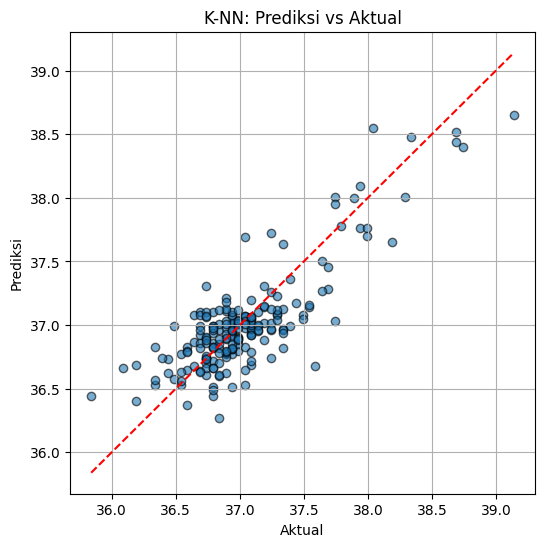

In [37]:
# Plot untuk KNN
plot_predictions(y_test, knn_preds, "K-NN: Prediksi vs Aktual")

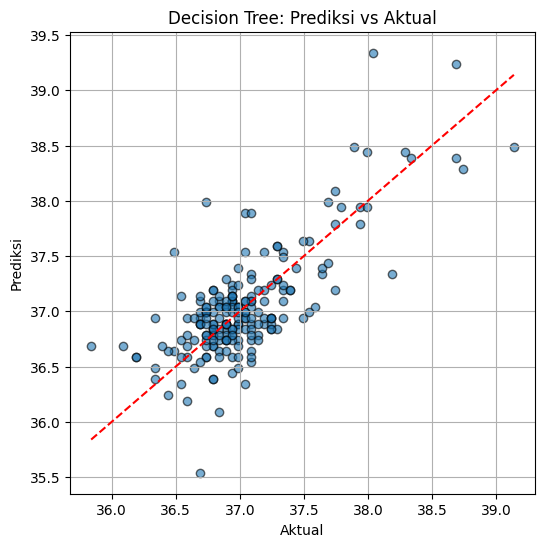

In [38]:
# Plot untuk Decision Tree
plot_predictions(y_test, dt_preds, "Decision Tree: Prediksi vs Aktual")

# **Penjelasan Persamaan Matematika**

## **1. Mean Squared Error (MSE)**

  Rumus :$$
  MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
  $$
  Penjelasan:
* 𝑛 = jumlah sampel
* $y_i$ = nilai aktual (sebenarnya)
* $\hat{y}_i$ = nilai prediksi dari model
* MSE menghitung rata-rata dari selisih kuadrat antara nilai aktual dan nilai prediksi.


  Interpretasi:
* Semakin kecil MSE → model semakin akurat.
* MSE menghukum kesalahan besar lebih keras, karena selisihnya dikuadratkan.

## **2. Root Mean Squared Error (RMSE)**

Rumus :$$
RMSE = \sqrt{MSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

Penjelasan:
* RMSE adalah akar kuadrat dari MSE.
* Satuannya sama dengan satuan target (misalnya jika target kamu = nilai rata-rata siswa, maka RMSE juga dalam skala nilai).

Interpretasi:
* Lebih mudah dipahami secara langsung daripada MSE.
* Semakin kecil RMSE, semakin baik modelnya.

## **3. R-squared (R²)**

Rumus :$$
R^2 = 1 - \frac{ \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }{ \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$

Penjelasan:
* $\bar{y}$ = rata-rata dari semua nilai aktual
* Pembilang = total error dari model (SS<sub>res</sub>)
* Penyebut = total variasi data (SS<sub>tot</sub>)

Interpretasi:
* Nilai R² berada antara:

  1 → prediksi sempurna (100% variasi dijelaskan model)

  0 → model tidak lebih baik dari rata-rata

  < 0 → model lebih buruk dari sekadar menebak rata-rata